<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Covid19_Vaccination_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Vaccination Data Visualisation Project

Explain the source of the data and the time frame it covers.

This data has been collated from many different government sources worldwide on vaccine numbers.
The first date is 14th Dec 2020 and the last data is 2nd May 2021, a small window into the vaccinations roll out round the world in a global pandemic. 



### Challenge 1 - prepare dataset for encoding 
---
1. Read Covid vaccination data from the `by_country` sheet in the Excel file at this link : https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true
2. Find out which columns have missing values
3. Remove all rows with missing data in the total_vaccination column  
4. Remove all rows with missing data in the daily_vaccinations_per_million 
5. find the median daily_vaccinations_per_million, storing this in a variable for use later     




In [217]:
import pandas as pd

def get_data(url, worksheet):
  #Read in the data from the By Country worksheet.
  df = pd.read_excel(url, worksheet)
  return df

url = "https://github.com/bjentwistle/PythonFundamentals/blob/main/Datasets/Covid%20Vaccination%20Data%20edited.xlsx?raw=true"
vaccine_data = get_data(url, "by_country")

vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_ful

Small function to print out the maximum and minimum values of a given column.

In [218]:
def get_maxandmin(df,column): 
  print(df[column].min())
  print(df[column].max())

get_maxandmin(vaccine_data,"date")

2020-12-14 00:00:00
2021-05-02 00:00:00


In [219]:
!pip install wordcloud

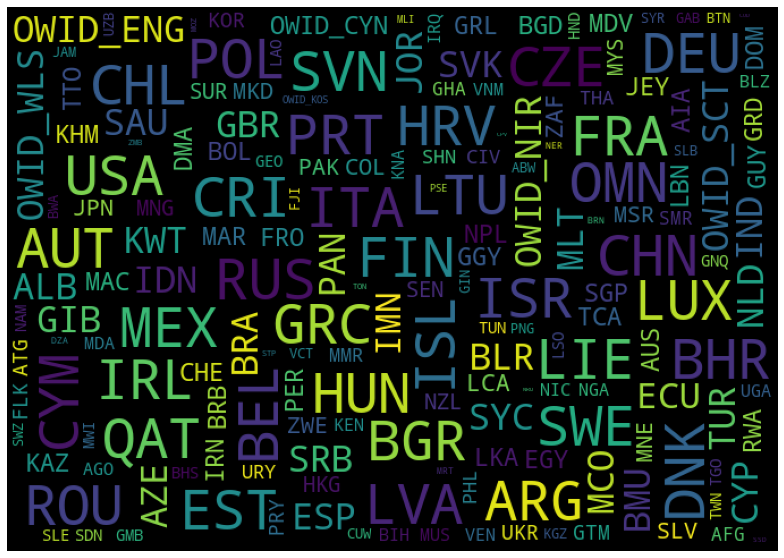

In [220]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Produce a wrodcloud image to show all the country codes within the dataframe.
def word_cloud(df):
  word_cloud = WordCloud(collocations=False, width=680, height=480,
                        margin=10, background_color='black', max_font_size = 50, 
                        repeat=False).generate(' '.join(df.iso_code))
  plt.figure(figsize=(30,10))
  plt.axis('off')
  plt.imshow(word_cloud)
  plt.show()

word_cloud(vaccine_data)

##14,994 rows of data with 15 columns (some with null data in)
The columns contain names of countries or numbers or vaccinations either by groups of one hundred or individuals and the date.

0	country - Country that the data was collected from.

1	 iso_code - a three letter abbreviation of the country, e.g. ALB for Albania.                        
2	date - the day on which that row of data was collected.                        
3   total_vaccinations - Total number of vaccinations that day?        
                       
3   total_vaccinations - Total number of vaccinations that day?        
4   people_vaccinated - ??

5   people_fully_vaccinated             
6   daily_vaccinations_raw              
7   daily_vaccinations                   
8   total_vaccinations_per_hundred       
9   people_vaccinated_per_hundred        
10  people_fully_vaccinated_per_hundred  
11  daily_vaccinations_per_million       
12  vaccines - list of the vaccine manufacturers used.                            
13  source_name - this refers to which Government department gave out the information.

For the purpose of this project I am only interested in rows that have data in the Total Vaccinations column. Hence all others are removed.


# Put table here from Word doc.

In [221]:
def remove_nulls(df,column):

  #Remove all rows with missing data in the given column 
  df_nulls_rm = df[~df[column].isnull()].reset_index(drop=True)
  df_nulls_rm.info()

  return df_nulls_rm

vaccine_data_nonulls = remove_nulls(vaccine_data,"total_vaccinations" )
#now we have 9,011 rows and 15 columns (still some null values)
vaccine_data_nonulls = remove_nulls(vaccine_data_nonulls,"daily_vaccinations_per_million")
#now we have 8,819 rows and 15 columns (still some null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              9011 non-null   object        
 1   iso_code                             9011 non-null   object        
 2   date                                 9011 non-null   datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8294 non-null   float64       
 5   people_fully_vaccinated              6157 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   8816 non-null   float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8294 non-null   float64       
 10  people_fully

### Encode daily vaccinations 
---

Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0 

In [222]:
#Find the median daily_vaccinations_per_million, storing this in a variable for use later 
median_daily = vaccine_data_nonulls["daily_vaccinations_per_million"].median()

#Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0
#rename the dataframe to make it easier to follow the code below
df_encoded = vaccine_data_nonulls #this is the df with 8819 rows

def encode_daily(df, **kwds):
  median = kwds["median"]
  column = kwds["column"]

  if df[column] >= median:
    return 1
  else:
    return 0

df_encoded["above median"] = df_encoded.apply(encode_daily, axis=1, column = "daily_vaccinations_per_million", median = median_daily)
df_encoded.info()
#now we have 8,819 rows and now have 16 columns (new column for "above median")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8816 entries, 0 to 8815
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8816 non-null   object        
 1   iso_code                             8816 non-null   object        
 2   date                                 8816 non-null   datetime64[ns]
 3   total_vaccinations                   8816 non-null   float64       
 4   people_vaccinated                    8126 non-null   float64       
 5   people_fully_vaccinated              6143 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   8816 non-null   float64       
 8   total_vaccinations_per_hundred       8816 non-null   float64       
 9   people_vaccinated_per_hundred        8126 non-null   float64       
 10  people_fully

###  Encoding total vaccinations   
---
The United Kingdom has been praised for its fast vaccine rollout. 
1. Find the minimum total vaccinations for the United Kingdom 
2. Write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
3. Display the unique countries for which total vaccinated is at the same rate or more than the UK

In [223]:
#Find the minimum total vaccinations for the United Kingdom 
#Filter the orgininal dataframe with all values in, using .loc to get the rows you want, ie United Kingdom only
df_UK_min = vaccine_data.loc[vaccine_data['country']== "United Kingdom", "total_vaccinations"].min()
print("UK Minimum = ", df_UK_min)


UK Minimum =  1402432.0


In [224]:
#Find the minimum total vaccinations for the United Kingdom 
#Filter the orgininal dataframe with all values in, using .loc to get the rows you want, ie United Kingdom only
df_UK_min = vaccine_data.loc[vaccine_data['country']== "United Kingdom", "total_vaccinations"].min()
print("UK Minimum = ", df_UK_min)

#Write a function to encode total_vaccinations column so that all values 
#less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1.
df_encoded_min = vaccine_data_nonulls 

def encode_above_Uk_min(df, **kwds):
  Min = kwds['minimum']
  column = kwds["column"]

  if df[column] >= Min:
    return 1
  else:
    return 0

df_encoded_min["above UK Minimum"] = df_encoded_min.apply(encode_above_Uk_min, axis=1, 
                                                          column = "total_vaccinations", minimum = df_UK_min)

df_encoded_min["above UK Minimum"].describe()

UK Minimum =  1402432.0


count    8816.000000
mean        0.304446
std         0.460199
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: above UK Minimum, dtype: float64

In [225]:
#Display the unique countries for which total vaccinated is at the same rate or more than the UK
def unique_countries(df):
  df = df[df["above UK Minimum"]==1]
  unique_countries = df["country"].unique()
  print("Unique countries = ", unique_countries.shape, unique_countries)
  return unique_countries

unique_countries = unique_countries(df_encoded_min)

Unique countries =  (59,) ['Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belgium'
 'Brazil' 'Cambodia' 'Canada' 'Chile' 'China' 'Colombia' 'Czechia'
 'Denmark' 'Dominican Republic' 'England' 'Finland' 'France' 'Germany'
 'Greece' 'Hong Kong' 'Hungary' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Malaysia' 'Mexico' 'Morocco' 'Nepal'
 'Netherlands' 'Norway' 'Pakistan' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Scotland' 'Serbia'
 'Singapore' 'Slovakia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkey' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Wales']


This list is of all the countries that have done as well or better than the United Kingdom with vaccinations in the time window of this dataset.

In [227]:
# To find out what each countries total vaccinations to date are, we need a list of each country and a running total of the daily vaccinated column.

countries_total_vaccinations = {}
for country in unique_countries: 
  vaccinated = 0
  for i in range(len(vaccine_data_nonulls)): 
    if vaccine_data_nonulls.country[i] == country:
        vaccinated += vaccine_data_nonulls.daily_vaccinations[i]
  countries_total_vaccinations[country] = vaccinated 
#     made a seperate dict from the df 
  countries_total_vaccinations_df = pd.DataFrame.from_dict(countries_total_vaccinations,
                                                         orient='index',
                                                         columns = ['total_vaccinted_todate']).reset_index(drop=False)
#     converted dict to df 
countries_total_vaccinations_df.sort_values(by = 'total_vaccinted_todate', ascending = False, inplace = True)
countries_total_vaccinations_df.reset_index()

,level_0,index,total_vaccinted_todate
0,56,United States,230574326.0
1,10,China,191064042.0
2,22,India,142545476.0
3,55,United Kingdom,46233917.0
4,15,England,38657920.0
5,6,Brazil,37025502.0
6,18,Germany,28518902.0
7,53,Turkey,22842253.0
8,17,France,21033008.0
9,26,Italy,19470446.0


In [236]:
import plotly.express as px
data= countries_total_vaccinations_df
fig = px.bar(data, x='index', y='total_vaccinted_todate', color='total_vaccinted_todate',
             labels={'total_vaccinted_todate':'Total Vaccinated to date', 'index':"Country"}, height=600)
fig.show()

This table head shows the top 5 countries who have vaccinated the most in the time to date, Dec 2020 to May 2021!

### Create new series of total vaccinations for each manufacturer
---

In [229]:
#Read data from 'by_manufacturer' sheet from Covid data 
url = "https://github.com/bjentwistle/PythonFundamentals/blob/main/Datasets/Covid%20Vaccination%20Data%20edited.xlsx?raw=true"
df_by_manufacturer = get_data(url, "by_manufacturer")

df_by_manufacturer.head(5)
#3,296 rows of data with 4 columns (No null data in)

,location,date,vaccine,total_vaccinations,total,percentage
0,Chile,2020-12-24,Pfizer/BioNTech,420,15647431011,2.684147e-08
1,Chile,2020-12-25,Pfizer/BioNTech,5198,15647431011,3.321951e-07
2,Chile,2020-12-26,Pfizer/BioNTech,8338,15647431011,5.328670e-07
3,Chile,2020-12-27,Pfizer/BioNTech,8649,15647431011,5.527425e-07
4,Chile,2020-12-28,Pfizer/BioNTech,8649,15647431011,5.527425e-07


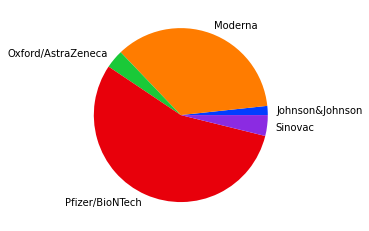

In [230]:
#Code from Chenjing who has been playing with plotting

import matplotlib.pyplot as plt
import seaborn as sns
def pie_chart_plotting(df,group, column):
  data = df.groupby(group)[column].sum()
  data = data
  labels = data.keys()
  colors = colors = sns.color_palette("bright")
  plt.pie(data, labels = labels, colors = colors)
  plt.show()

pie_chart_plotting(df_by_manufacturer,"vaccine", "total_vaccinations")

In [231]:
#Task 2 - find the sum of total vaccinations for each manufacturer (use groupby here to find the sum for each vaccine)
sum_by_manufacturer =df_by_manufacturer.groupby("vaccine")["total_vaccinations"].sum()
sum_by_manufacturer

vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64

In [232]:
#Task 3 - create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
    # to duplicate an existing column
    #     df['new_column'] = df['old_column']
    # to add two columns together
    #     df['new_column'] = df['column1'] + df['column2']
    # to make a percentages column
    #     df['new_column'] = (df['column1']/df['column1].sum()) * 100

df_by_manufacturer["total"] = df_by_manufacturer["total_vaccinations"].sum()
df_by_manufacturer["percentages"] = ((df_by_manufacturer['total_vaccinations']/df_by_manufacturer['total']) * 100)
df_by_manufacturer

,location,date,vaccine,total_vaccinations,total,percentage,total,percentages
0,Chile,2020-12-24,Pfizer/BioNTech,420,15647431011,2.684147e-08,15647431011,0.000003
1,Chile,2020-12-25,Pfizer/BioNTech,5198,15647431011,3.321951e-07,15647431011,0.000033
2,Chile,2020-12-26,Pfizer/BioNTech,8338,15647431011,5.328670e-07,15647431011,0.000053
3,Chile,2020-12-27,Pfizer/BioNTech,8649,15647431011,5.527425e-07,15647431011,0.000055
4,Chile,2020-12-28,Pfizer/BioNTech,8649,15647431011,5.527425e-07,15647431011,0.000055
...,...,...,...,...,...,...,...,...
3291,United States,2021-05-01,Moderna,105947940,15647431011,6.770948e-03,15647431011,0.677095
3292,United States,2021-05-01,Pfizer/BioNTech,129013657,15647431011,8.245038e-03,15647431011,0.824504
3293,United States,2021-05-02,Johnson&Johnson,8374395,15647431011,5.351930e-04,15647431011,0.053519
3294,United States,2021-05-02,Moderna,106780082,15647431011,6.824129e-03,15647431011,0.682413


In [233]:
# Task 4 - find the median of the percentages
median_percentage = df_by_manufacturer["percentages"].median()
median_percentage

0.0011110194374896931

In [234]:
#Task 5 - create a new column called 'encoded_percentages' which duplicates the percentages column
df_by_manufacturer["encoded_percentages"] = df_by_manufacturer["percentages"]

df_by_manufacturer

,location,date,vaccine,total_vaccinations,total,percentage,total,percentages,encoded_percentages
0,Chile,2020-12-24,Pfizer/BioNTech,420,15647431011,2.684147e-08,15647431011,0.000003,0.000003
1,Chile,2020-12-25,Pfizer/BioNTech,5198,15647431011,3.321951e-07,15647431011,0.000033,0.000033
2,Chile,2020-12-26,Pfizer/BioNTech,8338,15647431011,5.328670e-07,15647431011,0.000053,0.000053
3,Chile,2020-12-27,Pfizer/BioNTech,8649,15647431011,5.527425e-07,15647431011,0.000055,0.000055
4,Chile,2020-12-28,Pfizer/BioNTech,8649,15647431011,5.527425e-07,15647431011,0.000055,0.000055
...,...,...,...,...,...,...,...,...,...
3291,United States,2021-05-01,Moderna,105947940,15647431011,6.770948e-03,15647431011,0.677095,0.677095
3292,United States,2021-05-01,Pfizer/BioNTech,129013657,15647431011,8.245038e-03,15647431011,0.824504,0.824504
3293,United States,2021-05-02,Johnson&Johnson,8374395,15647431011,5.351930e-04,15647431011,0.053519,0.053519
3294,United States,2021-05-02,Moderna,106780082,15647431011,6.824129e-03,15647431011,0.682413,0.682413


In [235]:
#Task 6 - encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 

def encode_above_median(df, **kwds):
  median = kwds["percentage"]
  column = kwds["column"]
  if df[column] >= median:
    return 1
  else:
    return 0


df_by_manufacturer["encoded_percentages"] = df_by_manufacturer.apply(encode_above_median, axis = 1, percentage = median_percentage, column = "encoded_percentages")
df_by_manufacturer 


,location,date,vaccine,total_vaccinations,total,percentage,total,percentages,encoded_percentages
0,Chile,2020-12-24,Pfizer/BioNTech,420,15647431011,2.684147e-08,15647431011,0.000003,0
1,Chile,2020-12-25,Pfizer/BioNTech,5198,15647431011,3.321951e-07,15647431011,0.000033,0
2,Chile,2020-12-26,Pfizer/BioNTech,8338,15647431011,5.328670e-07,15647431011,0.000053,0
3,Chile,2020-12-27,Pfizer/BioNTech,8649,15647431011,5.527425e-07,15647431011,0.000055,0
4,Chile,2020-12-28,Pfizer/BioNTech,8649,15647431011,5.527425e-07,15647431011,0.000055,0
...,...,...,...,...,...,...,...,...,...
3291,United States,2021-05-01,Moderna,105947940,15647431011,6.770948e-03,15647431011,0.677095,1
3292,United States,2021-05-01,Pfizer/BioNTech,129013657,15647431011,8.245038e-03,15647431011,0.824504,1
3293,United States,2021-05-02,Johnson&Johnson,8374395,15647431011,5.351930e-04,15647431011,0.053519,1
3294,United States,2021-05-02,Moderna,106780082,15647431011,6.824129e-03,15647431011,0.682413,1


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: